## Wine Quality Prediction

## Context
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are 
much more normal wines than excellent or poor ones).

## Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

## Problem Statement:
    
We will be using decision tree to predict the quality of wine. The wine dataset is an example of multi-class classification problem.

## Relevant publication

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Number of Instances: red wine - 1599; white wine - 4898. 

## Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

## Missing Attribute Values: None

### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


## Required Packages for this Analysis

1. pip install missingno
2. pip install pydotplus
3. pip install pydot
4. pip install graphviz
5. conda intsall graphviz

Note - Intsall graphviz using both pip and conda.

### Import all necessary modules and load the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#---------------------------------------------Importing Required Libraries-----------------------------------
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split #--------------splitting data into test and train
from sklearn.tree import DecisionTreeClassifier #-----------Building decision tree model

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix #-----model validation scores
%matplotlib inline

from IPython.display import display #---------------------for displaying multiple data frames in one output

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step

import missingno as msno_plot #--------------plotting missing values

In [3]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')

### Observing first few records from the data - To get a look and feel of the variables 

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


It is always a good practice to eye-ball raw data to understand the structure of the file, number 
of attributes, types of attributes and a general idea of the challenges and bottle necks in the data set.

### Shape and Size of the data

Note that the data set doesn't have a primary key hence it is difficult to identify the level of the dataset

In [5]:
print('Shape:',wine_df.dtypes)
print('Size:',wine_df.shape)

Shape: fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Size: (1599, 12)


<b> Findings </b>

1. Data set consists of ~1.6K records across 12 attributes
2. All atrributes other than quality are of float type

### Descriptive statistics of columns using describe() function

In [7]:
wine_df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


### Findings

1. Quality of the wine ranges between 3 to 8, hence it is a multiclass classification problem

2. The 75th percentile scores of residual sugar, total sulfir dioxide, free sulfur dioxide indicates that the data is skewed or outliers are present in the data

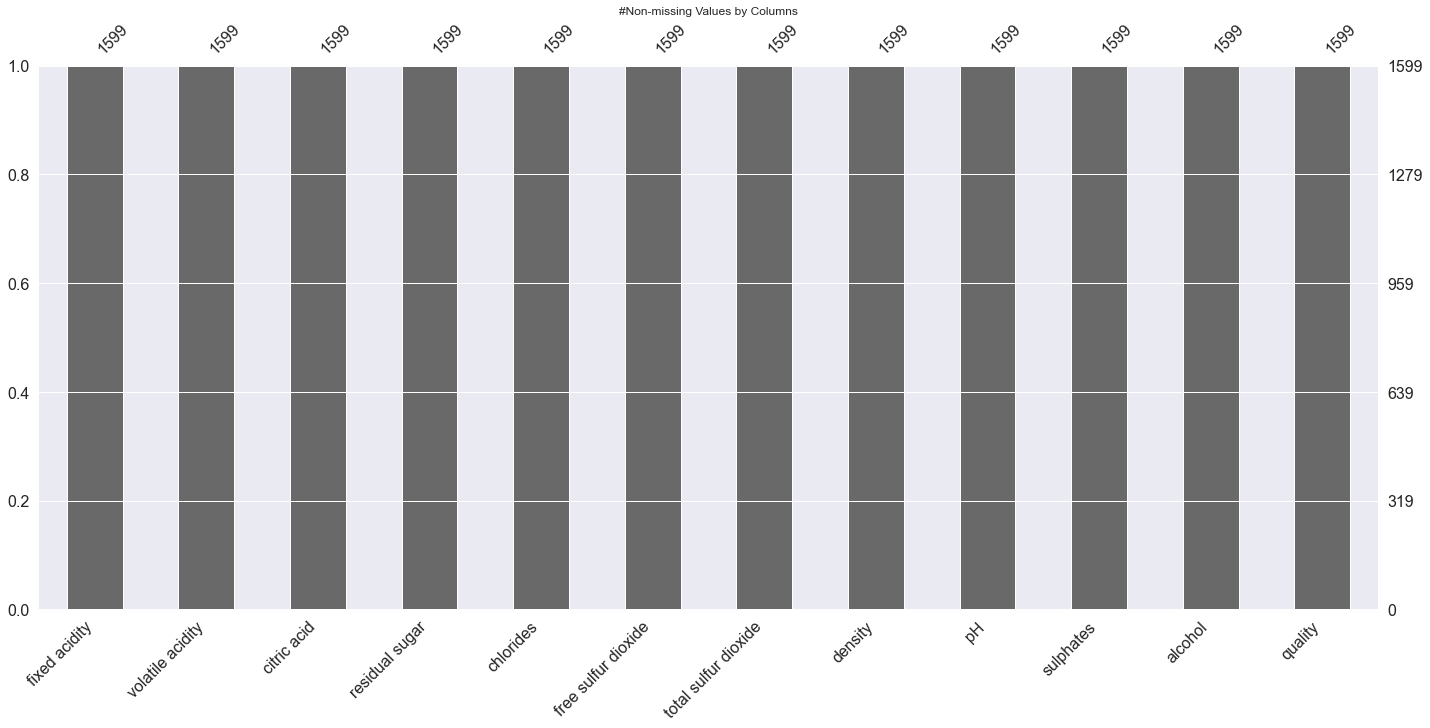

In [8]:
#-------------------------------------------Barplot of non-missing values--------------------------------
plt.title('#Non-missing Values by Columns')
msno_plot.bar(wine_df);

<b> Findings </b>

1. None of the columns have missing value

#### Checking for Outlier

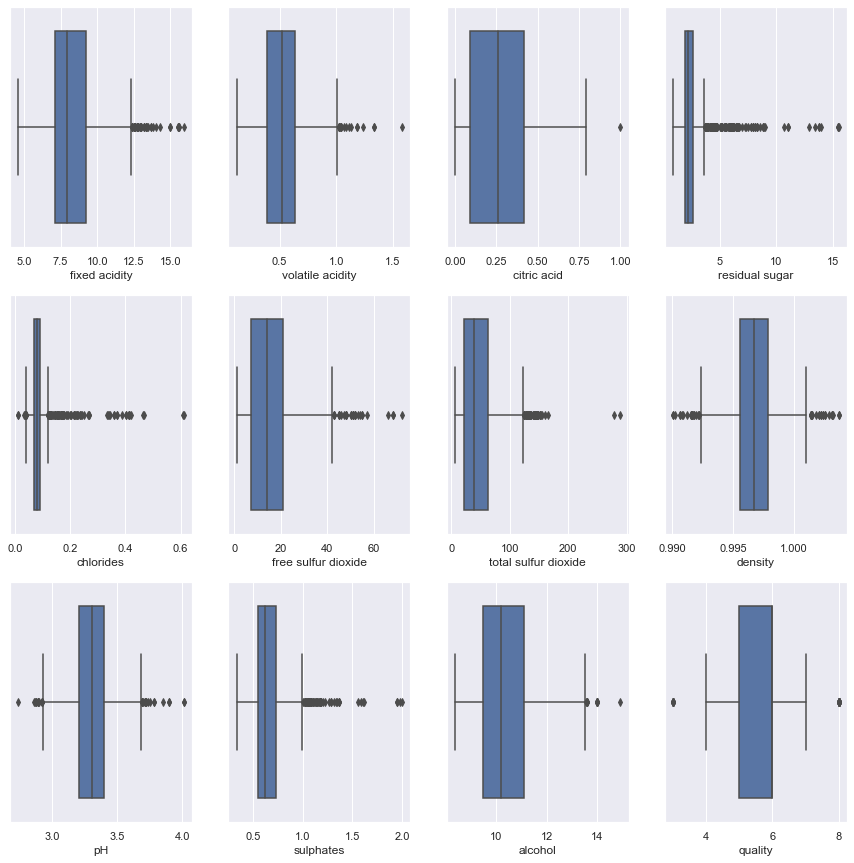

In [10]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in wine_df.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(wine_df[i])
    pos += 1 

In [12]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Outlier Treatment

In [13]:
col_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

display(col_names)

for i in col_names:
    q1, q2, q3 = wine_df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    wine_df[i]=wine_df[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

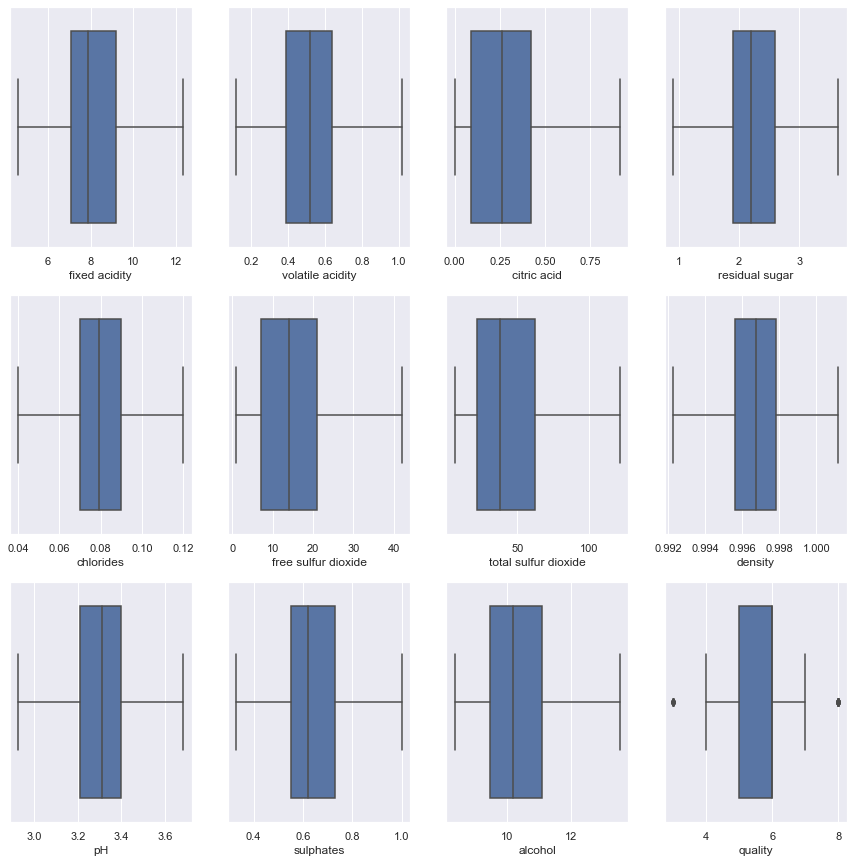

In [14]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in wine_df.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(wine_df[i])
    pos += 1 

### Univariate analysis of Quality

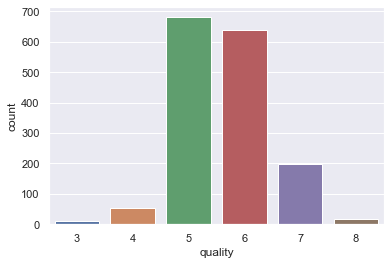

In [15]:
sns.countplot(wine_df['quality']);

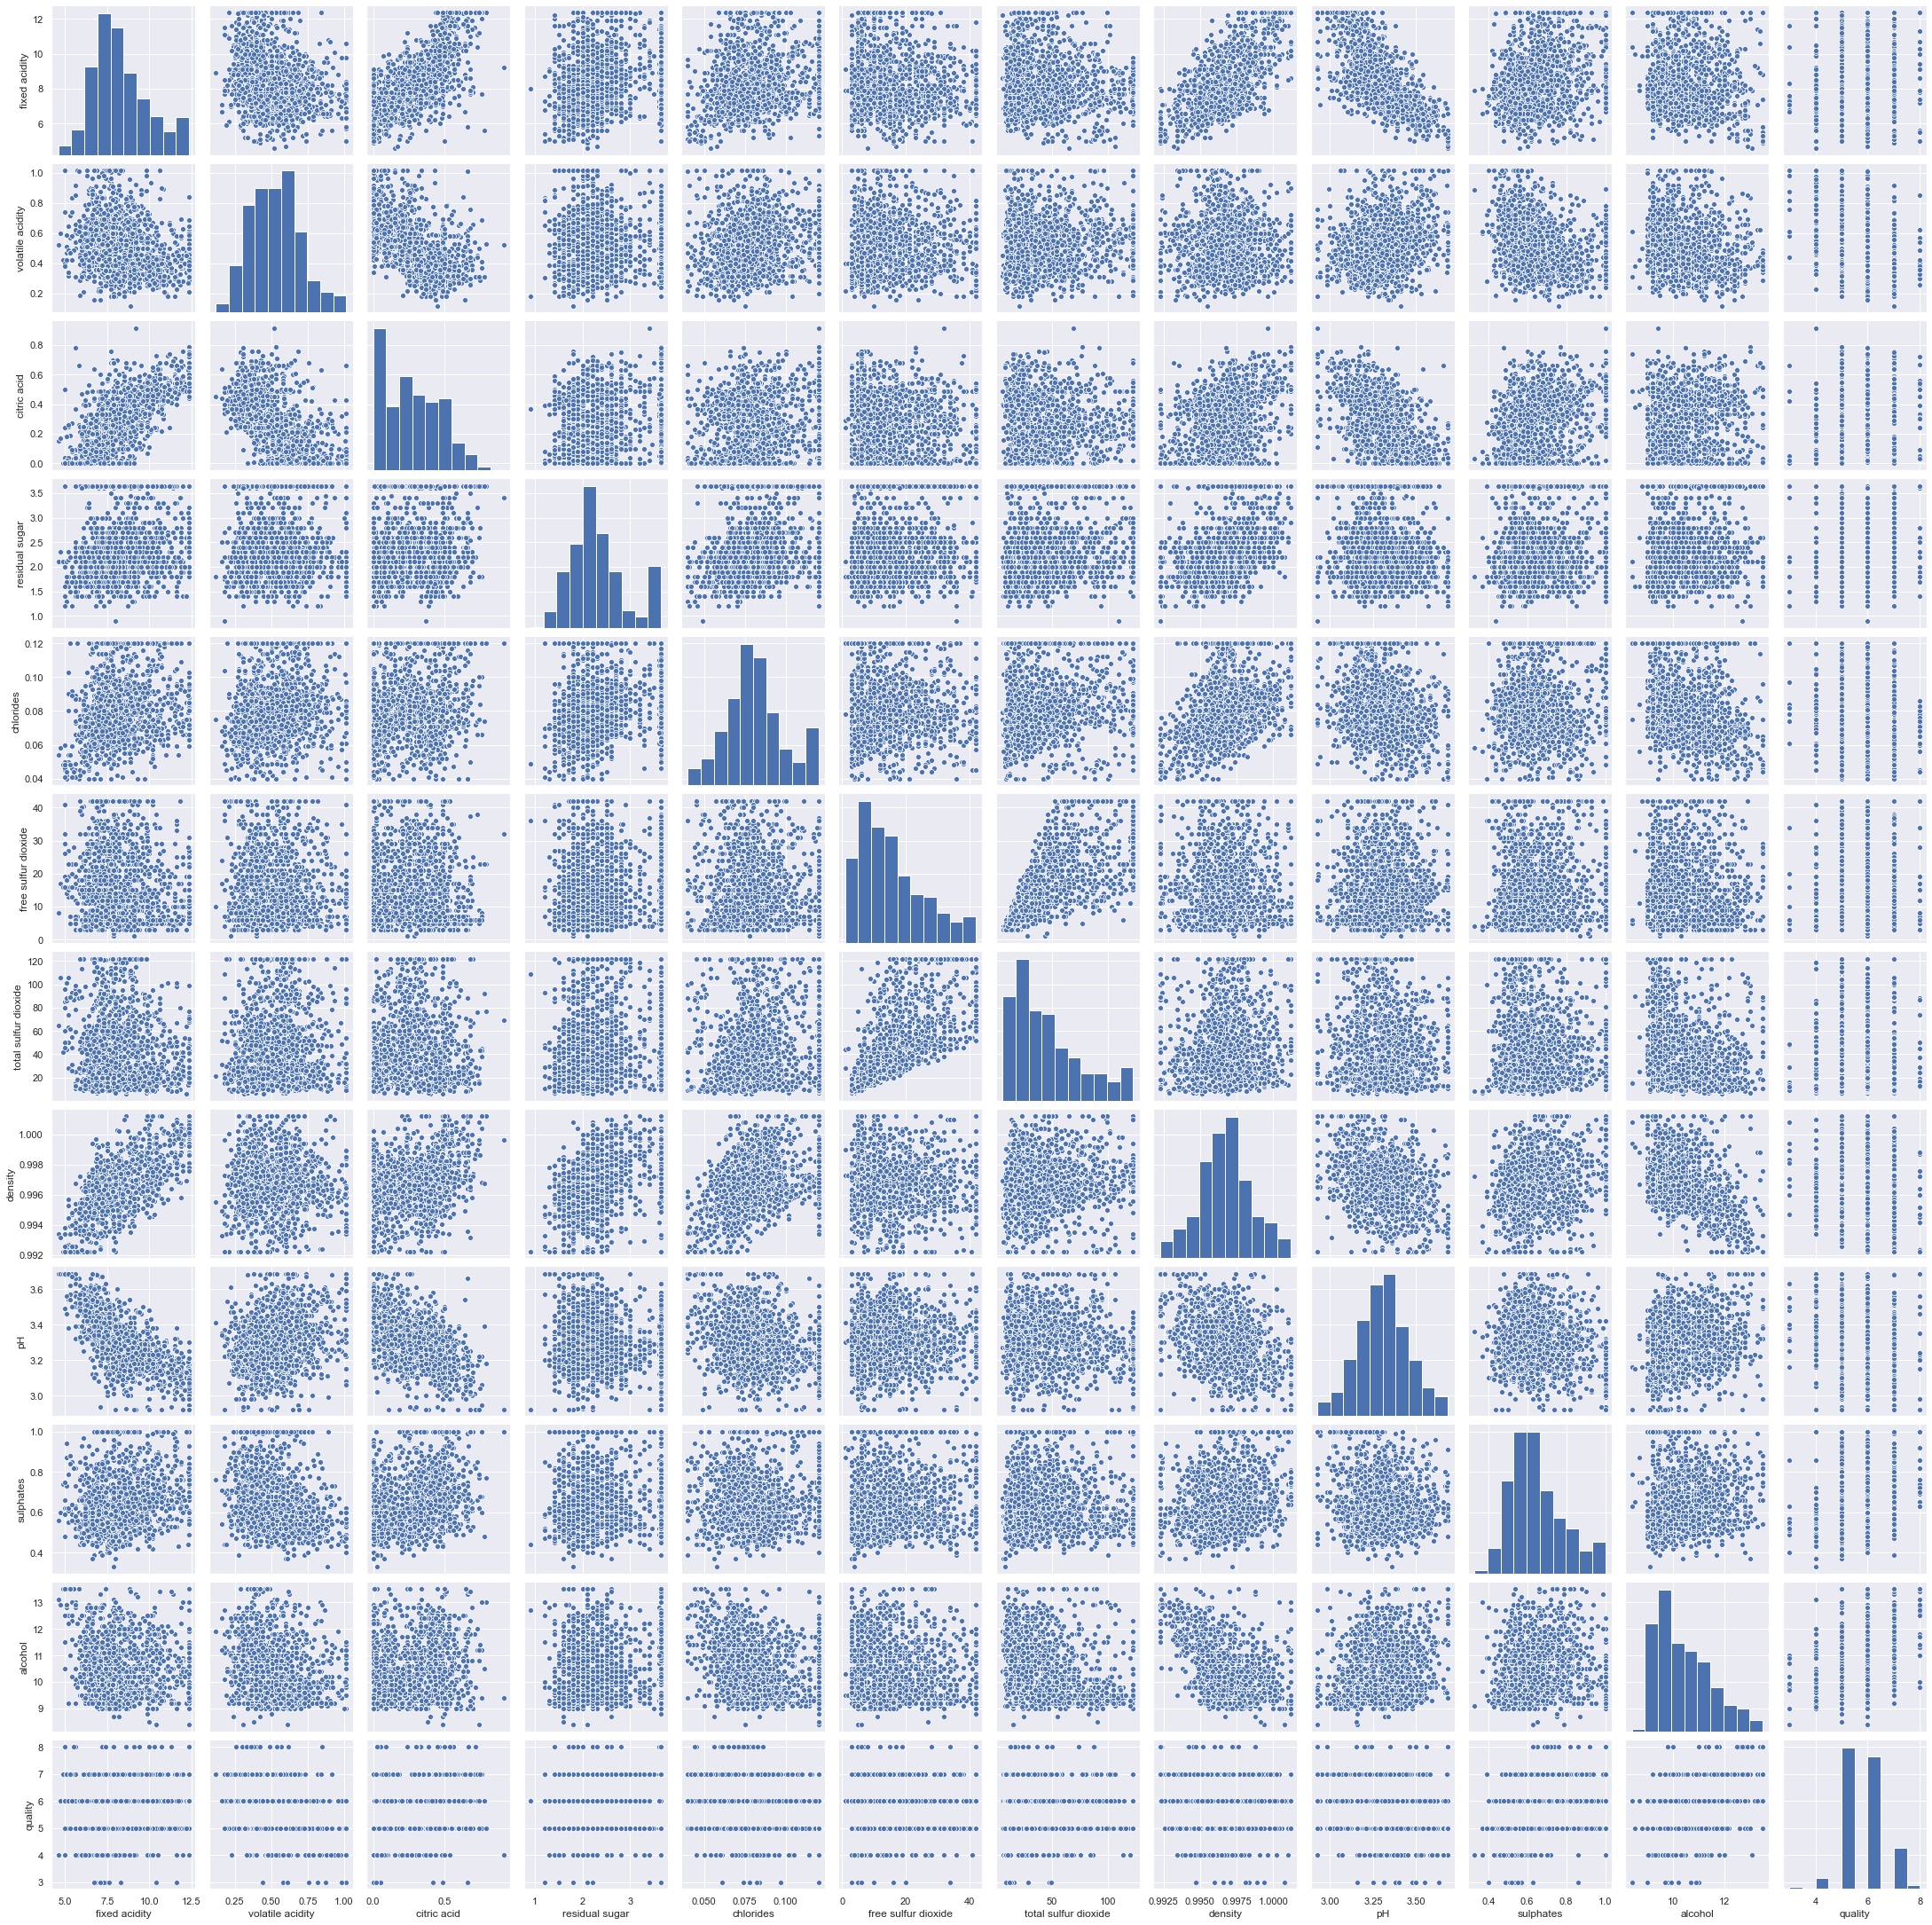

In [16]:
sns.pairplot(wine_df);

### Understanding relationship between different variables

Note - In Decision Trees, we need not remove highly correlated variables as nodes are divided into sub nodes using one independent variable only, hence even if two or more variables are highly correlated, the variable producing the highest information gain will be used for the analysis

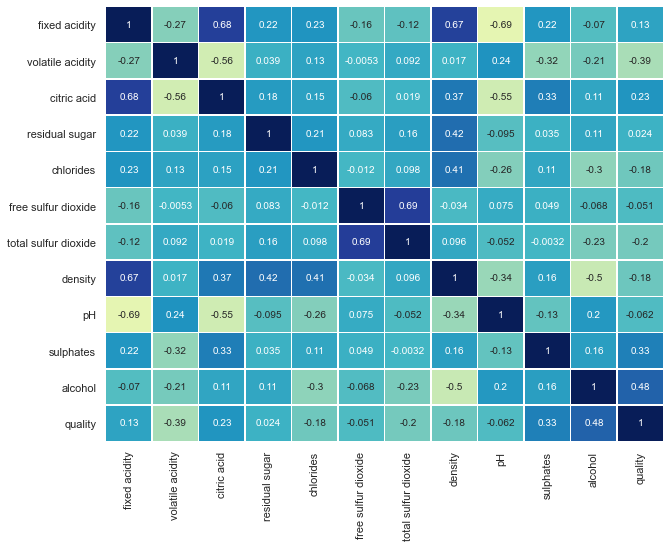

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

### Findings

1. Free Sulfur dioxide and total sulfur dioxide are highly correlated

2. density and fixed acidity is highly correlated

3. fixed acidity and citric acid are highly correlated


#### Before working on any classification algorithm it is important to check the class balance/imbalance

A class balance referes to a scenario where the target variable has similar proportions of ones and zeros in case of binary target variable. If the target variable is multi-class, i.e. it doesn't have 1s/0s but includes discrete numerics like 4, 5, 6, 7 etc, the proportion of 4s, 5s, 6s, 7s etc. should be similar.

In [18]:
#levels of Y variable
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

What we see above is class 5, 6 and 7 have higher data points than 3, 4 and 8 respectively. From a business stand point, we can combine these classes into groups of three, like high, medium and low. Since figures 3 to 8 represents quality, instead of having 6 classes we can narrow them down to 3. Decision trees can work with multiple classes. But reducing the classes solves two purpose.

1. Reduces class imbalance with having to create dummy or synthetic data points (remember SMOTE and NearMiss from last exercise)
2. Improves readability and interpretation of decision tree results

In [19]:
#Combine 7&8 together; combine 3 and 4 with 5 so that we have only 3 levels and a more balanced Y variable
wine_df['quality'] = wine_df['quality'].replace(8,7)
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'] = wine_df['quality'].replace(4,5)
wine_df['quality'].value_counts(normalize=True)

5    0.465291
6    0.398999
7    0.135710
Name: quality, dtype: float64

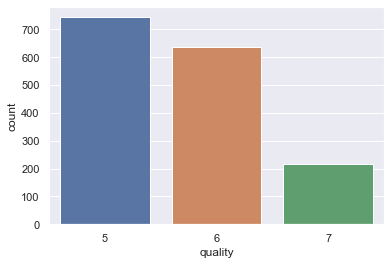

In [20]:
sns.countplot(wine_df['quality']);

#### Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [21]:
# splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.3,
                                                   random_state=22)
X_train.shape,X_test.shape

((1119, 11), (480, 11))

In [22]:
y_train.unique()

array([5, 6, 7], dtype=int64)

#### Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [24]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.

model_gini=DecisionTreeClassifier(criterion='gini', random_state=42)

In [25]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### Print the accuracy of the model & print the confusion matrix

In [26]:
print('Training Data Score:',model_gini.score(X_train, y_train))  # performance on train data

Training Data Score: 1.0


In [27]:
print('Testing Data Score:',model_gini.score(X_test, y_test))  # performance on test data

Testing Data Score: 0.6270833333333333


In [29]:
treeObj = model_gini.tree_
print ('Total Nodes:',treeObj.node_count)
print('Depth:',model_gini.get_depth())
print('Total Leaves:',model_gini.get_n_leaves())

Total Nodes: 505
Depth: 21
Total Leaves: 253


#### Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [35]:
model_entropy=DecisionTreeClassifier(criterion='entropy', random_state=42)

In [36]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
print('Training Data Score:',model_entropy.score(X_train, y_train))  # performance on train data

Training Data Score: 1.0


In [38]:
print('Testing Data Score:',model_entropy.score(X_test, y_test))  # performance on test data

Testing Data Score: 0.6333333333333333


In [39]:
treeObj = model_entropy.tree_
print ('Total Nodes:',treeObj.node_count)
print('Depth:',model_entropy.get_depth())
print('Total Leaves:',model_entropy.get_n_leaves())

Total Nodes: 473
Depth: 17
Total Leaves: 237


#### Why do we see an accuarcy of 1 on training data for both entropy and gini index

1. Decision Trees will keep spliting nodes till all leaf nodes are homogeneous, i.e. contains wine of same quality. Hence Decision Trees tend to overfit the training data and produces low accucarcy score when it comes to test data

#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

<b> Findings (Parameters used for building the tree) </b>

1. <b> criterion </b> - Gini impurity is used to decide the variables based on which root node and following decision nodes should be split
2. <b>class_weight </b> - None; All classes are assigned weight 1
3. <b>max_depth </b> - None; No pruning is done. None signifies that nodes will be expanded till all leaves are pure or all leaves have less than min_samples_split
4. <b>max_features </b> - None; All features are considered while deciding split of a node
5. <b>max_leaf_nodes </b> - None; 
6. <b>min_impurity_decrease </b> - 0.0; A node is split only when the split ensures a decrease in the impurity of greater than or equal to zero
7. <b>min_impurity_split </b> - None; 
8. <b>min_samples_leaf </b> - 1; The minimum number of samples required for a leaf node. Note by default, DecisionTreeClassifier ensures that there should be at least 1 sample in the left and right branches for a split to happen
9. <b>min_samples_split</b> - 2; Depends on min_samples_leaf
10. <b>splitter</b> - 'best'; Strategy used to choose the split at each node. Best ensure that all features are considered while deciding the split

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [40]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

## Visualizing the tree

#### You might need to install pydotplus and graphviz packages for visualising the tree. 

In [41]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = wine_df.drop('quality', axis=1)
feature_cols = xvar.columns

In [42]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])


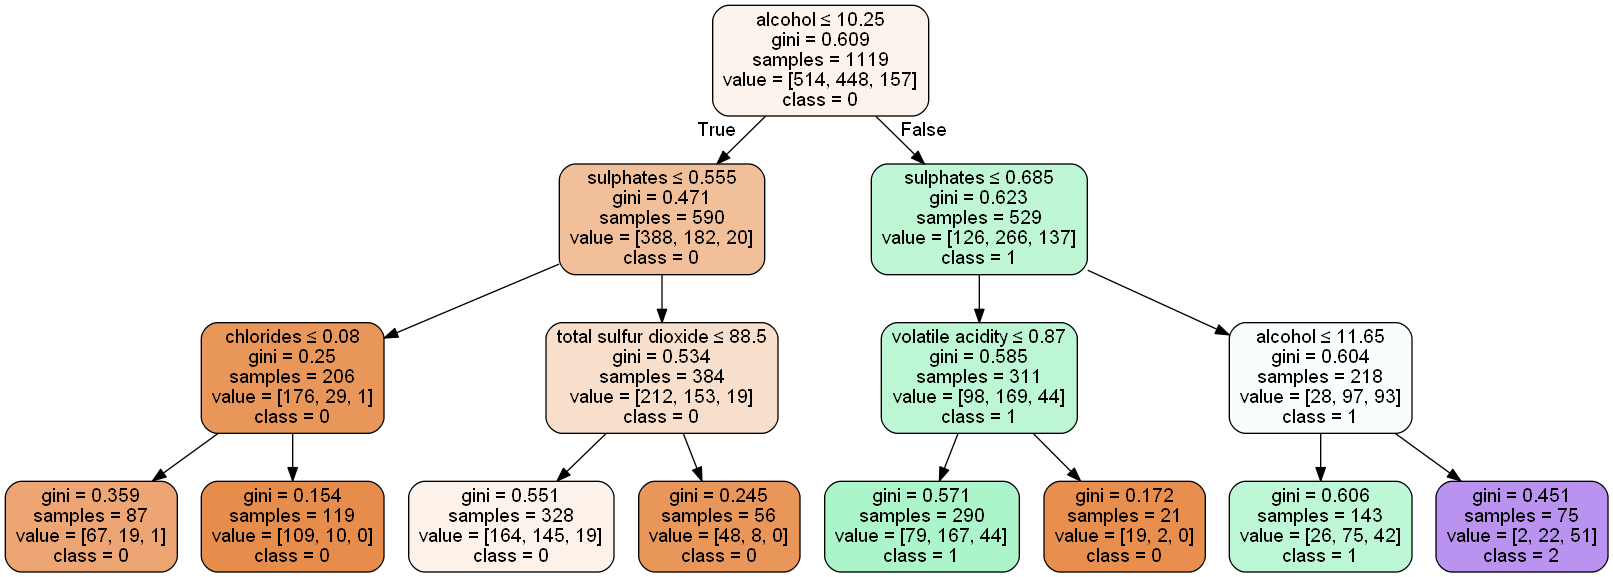

In [43]:
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [44]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [45]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.6020833333333333
0.6255585344057194


In [46]:
acc_DT = accuracy_score(y_test, preds_pruned)
clf_pruned.score(X_test,y_test)

0.6020833333333333

#### When the tree is regularised, overfitting is reduced, and there is slight increase in accuracy

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

In [47]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head()

,FeatureImportance
alcohol,0.574484
sulphates,0.254090
volatile acidity,0.086651
total sulfur dioxide,0.071356
chlorides,0.013419


How to determine which feature is important?

1. Calculate the information gain of each feature to determine which is important

When we look at the decision tree above, let's calculate the information gain for each node

Information Gain = Gini Impurity of Parent Node - Gini Impurity of Child Node

Gini Impurity of child Node is calcuated as a weighted average, i.e.
Impurity of Child Nodes = (Total Samples in Left Child Node / Total Samples in the Parent) * Gini Impurity of Left Child Node +  (Total Samples in Right Child Node / Total Samples in the Parent) * Gini Impurity of Right Child Node

Example:

Let's take Parent Node "chlorides <0.05". We need to understand the information gain on splitting this node.

Gini Impurity of Parent = 0.25
Gini Impurtity of Children Nodes = (87/206) x 0.359 + (119/206) x 0.154 = 0.2405

Information Gain = 0.25 - 0.2405 = 0.01



#### From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

#### Understanding Cost Complexity Pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. 

Think of it like you explicity tell the model what is the depth till which it should run and how many maximum leaves or teminal nodes can be present in the tree. However the biggest challenge is to determine what is the depth and maximum leaves that an user should select. In the example above we used max_depth=3, min_samples_leaf=5. These numbers are just example figures to see how the tree behaves. But if in relaity you were asked to work on this model and come up with a good depthy and sample leaves values, it is challenging but not impossible. (you can fine tune your tree using GridSearchCV algorithm).

<b> The other way of doing it is by using the Cost Complexity Pruning (CCP). </b>

Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.

In simpler terms cost complexity is a threshold value. The model split a node further in into it child node only when the overall impurity of the model is improved by a value greater than this threshold else it stops.

Lower the CCP, lower is the impurity. How?

When the value of CCP is lower the model will split a node into its child nodes even if the impurity doesn't decrease much. This is evident as the depth of the tree increases, i.e. as you go down a decision tree, you will find that split doesn't contribute much to the change in overall impurity of the model. However higher split ensures that the classes are categorized correctly, i.e. accuracy is more.

When CCP values are low, higher number of nodes are created. Higher the nodes, higher is the depth of the tree as well.

Let's validate these using the graphs below.

In [48]:
path = model_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

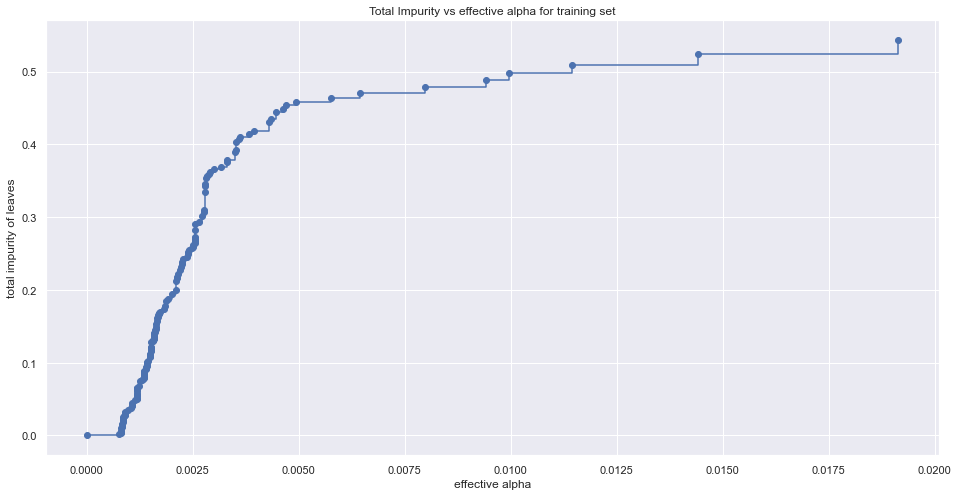

In [49]:
fig, ax = plt.subplots(figsize=(16,8));
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post");
ax.set_xlabel("effective alpha");
ax.set_ylabel("total impurity of leaves");
ax.set_title("Total Impurity vs effective alpha for training set");

In [50]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))



Number of nodes in the last tree is: 3 with ccp_alpha: 0.06589586421088878


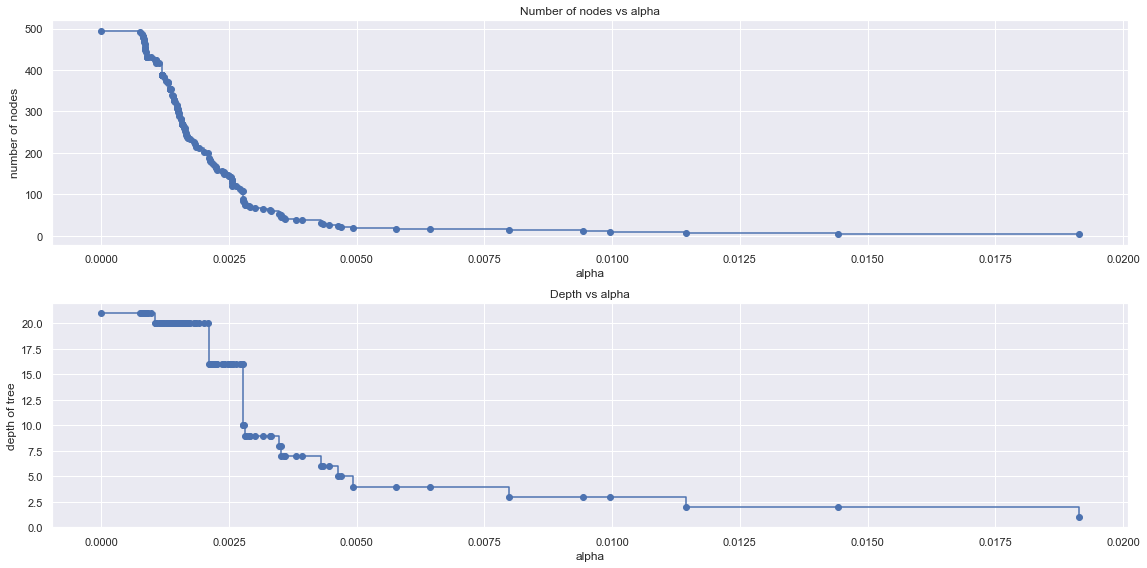

In [51]:
clfs = clfs[:-1]

ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]

depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1,figsize=(16,8))

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

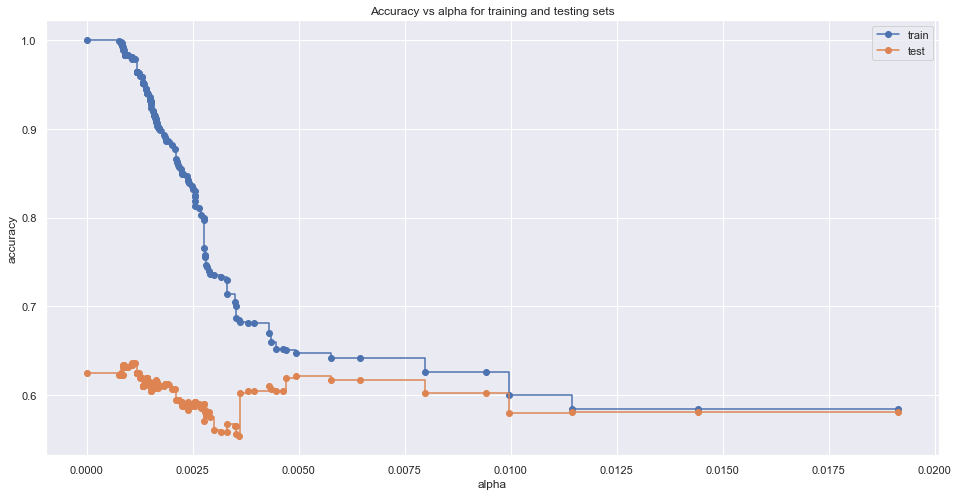

In [52]:
fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [53]:
#Converting the results into data frame.

i = np.arange(len(ccp_alphas))
ccp = pd.DataFrame({'Depth': pd.Series(depth,index=i),'Node' : pd.Series(node_counts, index=i),\
                    'ccp' : pd.Series(ccp_alphas, index = i),'train_scores' : pd.Series(train_scores, index = i),
                   'test_scores' : pd.Series(test_scores, index = i)})

ccp.tail()

,Depth,Node,ccp,train_scores,test_scores
144,3,11,0.009423,0.625559,0.602083
145,3,9,0.009968,0.599643,0.579167
146,2,7,0.011443,0.584450,0.581250
147,2,5,0.014412,0.584450,0.581250
148,1,3,0.019142,0.584450,0.581250


In [54]:
ccp[ccp['test_scores']==ccp['test_scores'].max()]

,Depth,Node,ccp,train_scores,test_scores
24,20,417,0.001073,0.978552,0.635417
25,20,417,0.001141,0.978552,0.635417
